Initial Setup: 

Loading all libraries and packages required.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

from scipy.stats import ttest_ind
import numpy as np

We will begin with a simple exploration of the data, its variable types and names, and some summary statistics.

In [15]:
# Load data into a pandas DataFrame
df = pd.read_csv("WoltAssignmentData.csv")

# Check the first five rows of the data
df.head()



,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [15]:
# Get the list of column names
column_names = df.columns
print(column_names)
column_types = df.dtypes
print(column_types)

Index(['REGISTRATION_DATE', 'REGISTRATION_COUNTRY', 'PURCHASE_COUNT',
       'PURCHASE_COUNT_DELIVERY', 'PURCHASE_COUNT_TAKEAWAY',
       'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY', 'USER_ID',
       'BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES',
       'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES', 'TOTAL_PURCHASES_EUR',
       'DISTINCT_PURCHASE_VENUE_COUNT', 'MIN_PURCHASE_VALUE_EUR',
       'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR', 'PREFERRED_DEVICE',
       'IOS_PURCHASES', 'WEB_PURCHASES', 'ANDROID_PURCHASES',
       'PREFERRED_RESTAURANT_TYPES', 'USER_HAS_VALID_PAYMENT_METHOD',
       'MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE',
       'MOST_COMMON_WEEKDAY_TO_PURCHASE', 'AVG_DAYS_BETWEEN_PURCHASES',
       'MEDIAN_DAYS_BETWEEN_PURCHASES', 'AVERAGE_DELIVERY_DISTANCE_KMS',
       'PURCHASE_COUNT_BY_STORE_TYPE'],
      dtype='object')
REGISTRATION_DATE                           object
REGISTRATION_COUNTRY                        object
PURCHASE_COUNT              

Summary Statistics

In [13]:
# Get summary statistics for the data
df.describe()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
count,21983.000000,12028.000000,12028.000000,21983.00000,12028.000000,12028.000000,12028.000000,12028.000000,12028.0,12028.000000,...,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000
mean,3.345358,5.741686,0.372464,10992.00000,0.193964,2.375042,0.493432,3.029016,0.0,176.210419,...,42.068043,31.195060,2.900482,1.056535,2.157133,11.501995,4.010392,64.293539,55.792135,5.961218
std,8.523171,10.536220,1.416310,6346.08982,1.104067,5.626178,1.827710,5.238209,0.0,299.086986,...,41.176221,20.716542,7.456288,4.776431,6.876314,6.930837,2.010071,72.570103,74.963336,3.466263
min,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,...,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000
25%,0.000000,1.000000,0.000000,5496.50000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,...,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.950500
50%,1.000000,2.000000,0.000000,10992.00000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,...,35.560000,27.324000,0.000000,0.000000,0.000000,11.500000,4.000000,39.500000,25.000000,5.928000
75%,3.000000,6.000000,0.000000,16487.50000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,...,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,68.250000,8.978000
max,320.000000,320.000000,44.000000,21983.00000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,...,3048.000000,657.800000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000


HISTOGRAMS

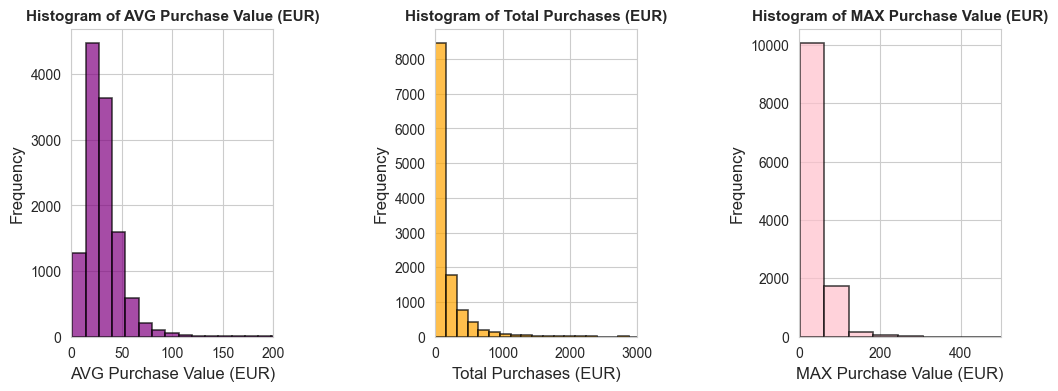

In [35]:

# create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# plot histogram of AVG_PURCHASE_VALUE_EUR
axs[0].hist(df['AVG_PURCHASE_VALUE_EUR'], bins=50, color='purple', alpha=0.7, edgecolor='black', linewidth=1.2)
axs[0].set_xlim(0, 200)
axs[0].set_xlabel("AVG Purchase Value (EUR)", fontsize=12)
axs[0].set_ylabel("Frequency", fontsize=12)
axs[0].set_title("Histogram of AVG Purchase Value (EUR)", fontsize=11, fontweight='bold')

# plot histogram of MAX_PURCHASE_VALUE_EUR
axs[2].hist(df['MAX_PURCHASE_VALUE_EUR'], bins=50, color='pink', alpha=0.7, edgecolor='black', linewidth=1.2)
axs[2].set_xlim(0, 500)
axs[2].set_xlabel("MAX Purchase Value (EUR)", fontsize=12)
axs[2].set_ylabel("Frequency", fontsize=12)
axs[2].set_title("Histogram of MAX Purchase Value (EUR)", fontsize=11, fontweight='bold')

# plot histogram of TOTAL_PURCHASES_EUR
axs[1].hist(df['TOTAL_PURCHASES_EUR'], bins=50, color='orange', alpha=0.7, edgecolor='black', linewidth=1.2)
axs[1].set_xlim(0, 3000)
axs[1].set_xlabel("Total Purchases (EUR)", fontsize=12)
axs[1].set_ylabel("Frequency", fontsize=12)
axs[1].set_title("Histogram of Total Purchases (EUR)", fontsize=11, fontweight='bold')


# adjust spacing between subplots
plt.subplots_adjust(wspace=0.8)

# show the plot
plt.show()

The distribution of AVG, MAX & TOTAL purchase value is by no means surprising, but it does help check for the prevalence of outliars or extreme cases. Next, we will create different segmentations to explore potential differences in their purchasing behavior.

Scatterplot 1:
Visualizing the difference in AVG purchase by the most common weekday to purchase.

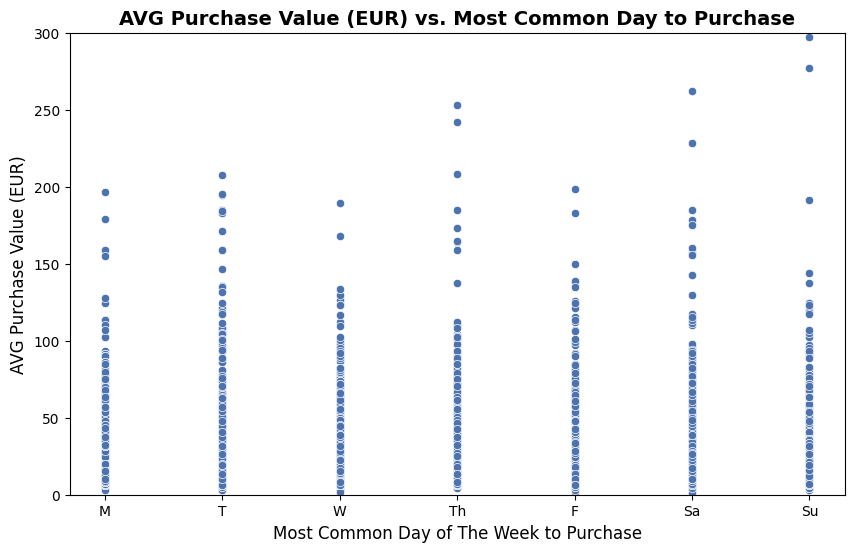

In [17]:
# Create a scatterplot of AVG_PURCHASE_VALUE_EUR vs. MOST_COMMON_WEEKDAY_TO_PURCHASE
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='MOST_COMMON_WEEKDAY_TO_PURCHASE', y='AVG_PURCHASE_VALUE_EUR', color='#4C72B0', ax=ax)

# Set the x-axis label
days = ['M', 'T', 'W', 'Th', 'F', 'Sa', 'Su']
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=days)

# Set the plot title and axis labels
plt.title("AVG Purchase Value (EUR) vs. Most Common Day to Purchase", fontsize=14, fontweight='bold')
plt.xlabel("Most Common Day of The Week to Purchase", fontsize=12)
plt.ylabel("AVG Purchase Value (EUR)", fontsize=12)

# Remove outliers
plt.ylim(0, 300)

# Show the plot
plt.show()

There seems to be a quite equal distribution for the average purchase value, with some higher peaks for weekend orders. However, it will need a one-way ANOVA to assess if that difference is statistically significant.

In [19]:
# Group the data by day of the week
monday = df[df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] == 1]['AVG_PURCHASE_VALUE_EUR']
tuesday = df[df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] == 2]['AVG_PURCHASE_VALUE_EUR']
wednesday = df[df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] == 3]['AVG_PURCHASE_VALUE_EUR']
thursday = df[df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] == 4]['AVG_PURCHASE_VALUE_EUR']
friday = df[df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] == 5]['AVG_PURCHASE_VALUE_EUR']
saturday = df[df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] == 6]['AVG_PURCHASE_VALUE_EUR']
sunday = df[df['MOST_COMMON_WEEKDAY_TO_PURCHASE'] == 7]['AVG_PURCHASE_VALUE_EUR']

# Perform the one-way ANOVA test
f_statistic, p_value = stats.f_oneway(monday, tuesday, wednesday, thursday, friday, saturday, sunday)

# Print the results
print("F-statistic: {:.2f}".format(f_statistic))
print("p-value: {:.4f}".format(p_value))


F-statistic: 0.82
p-value: 0.5554
There is not enough evidence to conclude that there is a statistically significant difference between any two days.


There is not enough evidence to conclude that there is a statistically significant difference between any two days (p=0.56).

Scatterplot 2:
We will now check for differences in AVG purchase value depending on PURCHASE COUNT. It could be a helpful step in assessing if loyal and recurrent customers increase or decrease their average amount spent over time. To make the scatterplot more informative, I assigned a different color to each preferred device type ('ios', 'android', 'web', and 'default') and used the 'fillna' method to replace any missing preferred device values with 'default'. I then applied the color scheme to my scatterplot using the 'c' parameter. For better visualization, we will remove extreme values.

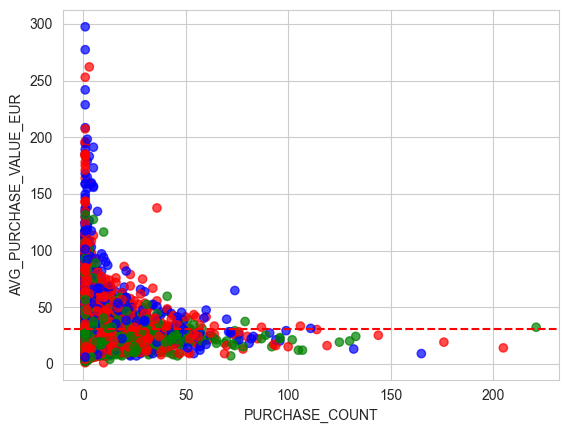

In [38]:

# Remove outliers
df = df[(df['AVG_PURCHASE_VALUE_EUR'] <= 300) & (df['PURCHASE_COUNT'] <= 300)]

# Replace NaN values with a default color
df['PREFERRED_DEVICE'].fillna('default', inplace=True)

# Set colors for each preferred device
colors = {'ios': "red", 'android': "green", 'web': "blue", 'default': "grey"}
df['color'] = df['PREFERRED_DEVICE'].apply(lambda x: colors[x])

# Calculate the mean value of AVG_PURCHASE_VALUE_EUR
mean_avg_purchase_value = df['AVG_PURCHASE_VALUE_EUR'].mean()

# Create the scatter plot
plt.scatter(df['PURCHASE_COUNT'], df['AVG_PURCHASE_VALUE_EUR'], c=df['color'], alpha=0.7)

# Add the mean line
plt.axhline(y=mean_avg_purchase_value, color='r', linestyle='--')

plt.xlabel("PURCHASE_COUNT")
plt.ylabel("AVG_PURCHASE_VALUE_EUR")
plt.show()


We observe how after the first 50 purchases, the average value of each purhcase stabilizes slightly below the average (€31.19)

Scatterplot 3:
For the third graph, I decided to check for the users longevity using the app, in days, as a different approach to PURCHASE_COUNT. 

First, I filtered out any rows where the average purchase value in euros was greater than 300 or the purchase count was greater than 300 to avoid outliars. 

Then, I converted the 'FIRST_PURCHASE_DAY' and 'LAST_PURCHASE_DAY' columns to datetime format and created a new column called 'DAYS_ACTIVE' to calculate the number of days between a customer's first and last purchase. Additionally, I scaled the size of each dot according to the purchase count, making it easier to see the impact of different purchase counts on customer behavior.

C:\Users\innac\AppData\Local\Temp\ipykernel_18860\3549354794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
C:\Users\innac\AppData\Local\Temp\ipykernel_18860\3549354794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])
C:\Users\innac\AppData\Local\Temp\ipykernel_18860\3549354794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

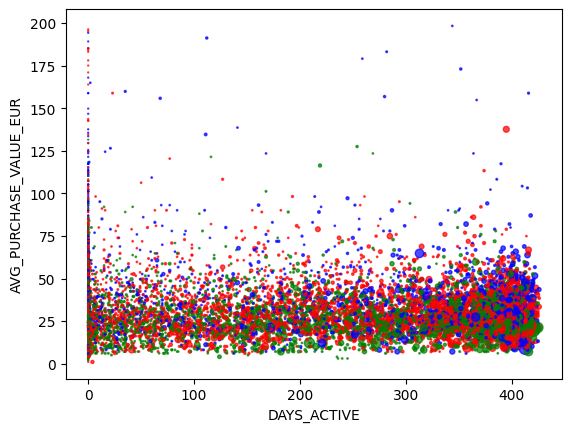

In [7]:
df = df[(df['AVG_PURCHASE_VALUE_EUR'] <= 200) & (df['PURCHASE_COUNT'] <= 300)]

df['FIRST_PURCHASE_DAY'] = pd.to_datetime(df['FIRST_PURCHASE_DAY'])
df['LAST_PURCHASE_DAY'] = pd.to_datetime(df['LAST_PURCHASE_DAY'])
df['DAYS_ACTIVE'] = (df['LAST_PURCHASE_DAY'] - df['FIRST_PURCHASE_DAY']).dt.days
# Set colors for each preferred device
colors = {'ios': "red", 'android': "green", 'web': "blue", 'default': "grey"}
df['color'] = df['PREFERRED_DEVICE'].fillna('default').apply(lambda x: colors[x])
# Scale the PURCHASE_COUNT values to a suitable size range
sizes = df['PURCHASE_COUNT'] / 2

plt.scatter(df['DAYS_ACTIVE'], df['AVG_PURCHASE_VALUE_EUR'], c=df['color'], s=sizes, alpha=0.7)
plt.xlabel('DAYS_ACTIVE')
plt.ylabel('AVG_PURCHASE_VALUE_EUR')
plt.show()

The graph shows an overall even spread of the AVG_PURCHASE_VALUE, with high peaks on its value for first-time orders, similarly as what happened with Purchase Count. This could be an effect of promotions or discounts applied to new clients helping to increase the initial purchase in comparison with an actual average purchase. Moreover, there seems to be a higher prevalence of Web orders on the right side of the graph, which implies a longer longevity of Web accounts. 


Dot size is adjusted so it represents PURCHASE_COUNT, and unsurprisingly, the increase in size coresponds with the increase in DAYS_ACTIVE too.

Let's dive a bit deeper into PREFERRED_DEVICE and its distribution, since it has seemed a viable segmenter so far. 

In [14]:
# To see the summary of PREFERRED_DEVICE
print(df['PREFERRED_DEVICE'].value_counts())


ios        9747
android    8448
web        3715
Name: PREFERRED_DEVICE, dtype: int64


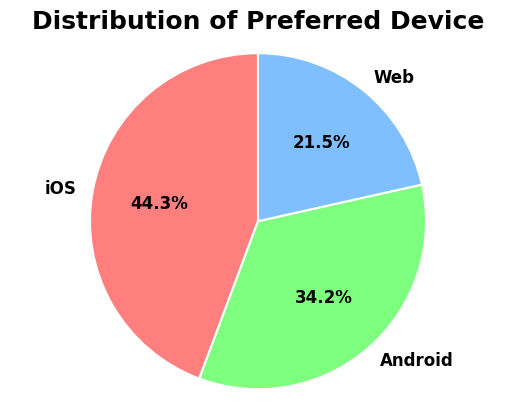

In [7]:
# Get count of each device
ios_count = df['PREFERRED_DEVICE'].value_counts()['ios']
android_count = df['PREFERRED_DEVICE'].value_counts()['android']
web_count = df['PREFERRED_DEVICE'].value_counts()['web']

# Set colors for each device
colors = {'ios': "#ff7f7f", 'android': "#7fff7f", 'web': "#7fbfff"}

# Create pie chart
fig, ax = plt.subplots()
ax.pie([ios_count, android_count, web_count], labels=['iOS', 'Android', 'Web'],
       colors=[colors['ios'], colors['android'], colors['web']],
       startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12, 'fontweight': 'bold'})
ax.set_title('Distribution of Preferred Device', fontsize=18, fontweight='bold')
ax.axis('equal')

# Add borders to the pie chart
for w in ax.patches:
    w.set_linewidth(1.5)
    w.set_edgecolor('white')
    
plt.show()


ANOVA
The distribution by devices looks very promising, so I check for signs of statistically significant differences across devices for their average purchase value.

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit an ANOVA model
model = ols("AVG_PURCHASE_VALUE_EUR ~ C(PREFERRED_DEVICE)", data=df).fit()
# Run ANOVA test
result = sm.stats.anova_lm(model, typ=2)
# Print ANOVA test result
print(result)


                           sum_sq       df           F        PR(>F)
C(PREFERRED_DEVICE)  1.518815e+05      3.0  143.777897  1.553030e-91
Residual             4.232491e+06  12020.0         NaN           NaN


The result of the ANOVA test shows that there is a significant difference in the average purchase value (EUR) between the different preferred devices.
The sum_sq (1.52) is the total sum of squares of the differences between each observation and the mean of the data. It provides an indication of the amount of variation in the data.
The high F-value (143.78) indicates that there is a large difference in average purchase value (EUR) between the groups.
The p-value (1.55e-91) indicates that the result is statistically significant, which means that we reject the null hypothesis and accept the alternative hypothesis that there is a significant difference in average purchase value (EUR) between the groups.



In conclusion, the results of the ANOVA test indicate that there is a significant difference in average purchase value (EUR) between the different preferred devices. This means that there are significant differences in the average purchase value (EUR) between people who use different preferred devices. The results suggest that it is necessary to consider the preferred device when analyzing the average purchase value (EUR) and developing marketing strategies to target different customer segments.

After conducting an ANOVA, a common next step would be to perform post-hoc tests to identify which specific groups or levels differ from each other.

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
android default  -3.7582 0.9972 -51.9784  44.462  False
android     ios   4.3856    0.0   3.3845  5.3868   True
android     web   9.7423    0.0   8.5322 10.9523   True
default     ios   8.1439 0.9726  -40.075 56.3627  False
default     web  13.5005 0.8894 -34.7231 61.7241  False
    ios     web   5.3566    0.0   4.2014  6.5119   True
-------------------------------------------------------


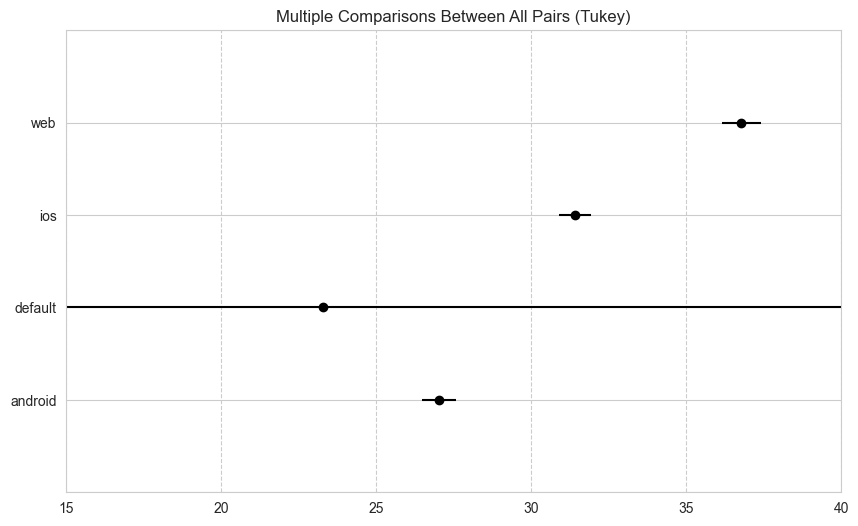

In [53]:
import seaborn as sns
from statsmodels.stats.multicomp import MultiComparison


# Perform Tukey's HSD test and print results
mc = MultiComparison(df['AVG_PURCHASE_VALUE_EUR'], df['PREFERRED_DEVICE'])
tukey_results = mc.tukeyhsd()
print(tukey_results)

# Plot the Tukey results
tukey_results.plot_simultaneous()
plt.xlim(15, 40)
plt.xticks(np.arange(15, 41, 5))
plt.grid(True, which='both', linestyle='--', axis='x')
plt.show()

Based on the results of the Tukey HSD test with a family-wise error rate (FWER) of 0.05, there was no significant difference in average purchase value between customers who preferred Android and those who did not specify a preferred device. However, customers who preferred iOS or the web had significantly higher average purchase values than those who preferred Android. Additionally, customers who preferred the web had significantly higher average purchase values than those who did not specify a preferred device.

ANOVA 2

Just as a failsafe, I ran an ANOVA on MOST_COMMON_WEEKDAY_TO_PURCHASE, to ensure that those differences were not significant.


In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('AVG_PURCHASE_VALUE_EUR ~ C(MOST_COMMON_WEEKDAY_TO_PURCHASE)', data=df).fit()

# Get the ANOVA table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)


                                          sum_sq       df         F    PR(>F)
C(MOST_COMMON_WEEKDAY_TO_PURCHASE)  1.397980e+03      6.0  0.638817  0.699273
Residual                            4.382974e+06  12017.0       NaN       NaN


We find no statistically significant difference in average amount spent depending on most common day of the week (p = 0.70)

ANOVA 3

Similarly, I decided to try the same analysis with MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE to check for a possible difference in average purchas value throughout a given day.

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
model = ols('AVG_PURCHASE_VALUE_EUR ~ C(MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE)', data=df).fit()

# Get the ANOVA table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                                                  sum_sq       df         F  \
C(MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE)  1.207747e+04     23.0  1.224052   
Residual                                    5.149612e+06  12004.0       NaN   

                                              PR(>F)  
C(MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE)  0.210355  
Residual                                         NaN  


The result of an ANOVA test between preferred hour of the day and the average amount has shown a relatively low F-statistic of 1.16 and a high p-value of 0.27. This suggests that there is no significant difference in the average amount spent between the different preferred hours of the day. In other words, the preferred hour of the day does not have a significant effect on the average amount spent.

CORRELATION MATRIX

C:\Users\innac\AppData\Local\Temp\ipykernel_18860\3534131512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PREFERRED_DEVICE_FACTOR'] = df['PREFERRED_DEVICE'].map({'ios': 1, 'android': 2, 'web': 3})


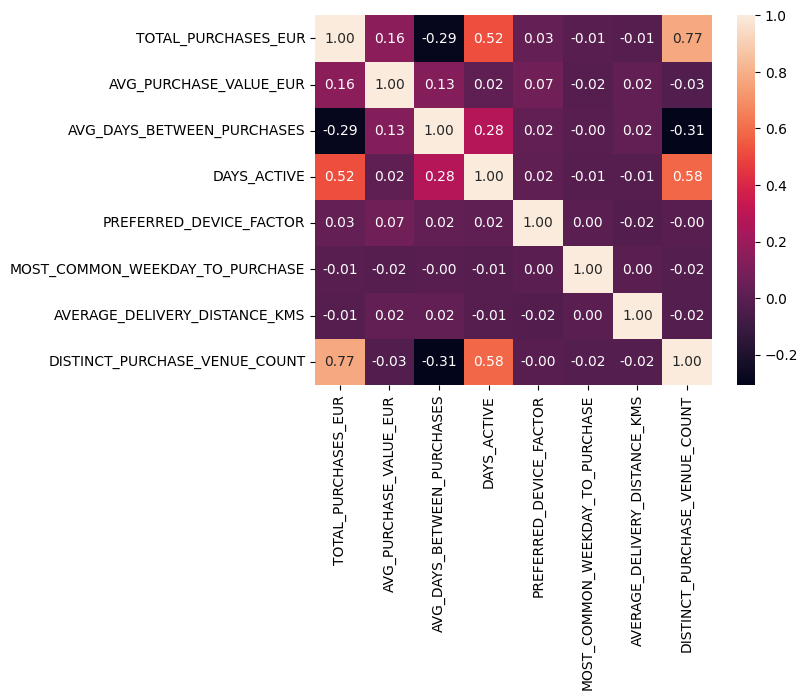

In [13]:
# Create PREFERRED_DEVICE_FACTOR
df['PREFERRED_DEVICE_FACTOR'] = df['PREFERRED_DEVICE'].map({'ios': 1, 'android': 2, 'web': 3})

# Calculate the correlation matrix
corr_matrix = df[["TOTAL_PURCHASES_EUR", "AVG_PURCHASE_VALUE_EUR", "AVG_DAYS_BETWEEN_PURCHASES", "DAYS_ACTIVE","PREFERRED_DEVICE_FACTOR", "MOST_COMMON_WEEKDAY_TO_PURCHASE", "AVERAGE_DELIVERY_DISTANCE_KMS", "DISTINCT_PURCHASE_VENUE_COUNT"]].corr()

# Plot the correlation matrix using seaborn's heatmap function
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

plt.show()

plt.show()

The correlation heatmap allows for a bit deeper insight at how the main variables used throughout the project interact with each other. We find somewhat strong correlations but with no statistical significance. 

As an additional exploration, I decided to look into users with specified Preferred Restaurants and compare them with those who had not chosen any specific preference, to check if this higher engagement would lead top an increased AVG_PURCHASE_VALUE_EUR. However, the t-test came back as non valid, probably due to insuficient sample size as most people did not select a preference.


In [ ]:
# Select only the rows where PREFERRED_RESTAURANT_TYPES is not NaN
pref_rest_types = df[df['PREFERRED_RESTAURANT_TYPES'].notna()]

# Select the rows where PREFERRED_RESTAURANT_TYPES is NaN
no_pref_rest_types = df[df['PREFERRED_RESTAURANT_TYPES'].isna()]

# Calculate the mean purchase value for each group
mean_pref = np.mean(pref_rest_types['AVG_PURCHASE_VALUE_EUR'])
mean_no_pref = np.mean(no_pref_rest_types['AVG_PURCHASE_VALUE_EUR'])

# Perform a t-test to determine if the means are significantly different
t_stat, p_value = ttest_ind(pref_rest_types['AVG_PURCHASE_VALUE_EUR'], no_pref_rest_types['AVG_PURCHASE_VALUE_EUR'], equal_var=False)

# Print the mean purchase value for each group and the t-test results
print(f"Mean purchase value for subjects with preferred restaurant types: {mean_pref:.2f}")
print(f"Mean purchase value for subjects with no preferred restaurant types: {mean_no_pref:.2f}")
print(f"T-test results: t-statistic={t_stat:.2f}, p-value={p_value:.4f}")

Mean purchase value for subjects with preferred restaurant types: 33.13
Mean purchase value for subjects with no preferred restaurant types: 30.64
T-test results: t-statistic=nan, p-value=nan


FINAL REMARKS, LIMITATIONS AND LEARNINGS

Overall, we have assessed and visualize the dataset in a variety of ways. We identified some key target variables in the purchase value (AVG, MAX & TOTAL) and checked for causes and segmenters for differences in those variables. Although the exploration is of course constrained by the timing and dimensions of the assignment, we did find that the preferred device of users gives very insightful information about their purchasing habits.

In further explorations, it could be possible to tailor more complex, ad-hoc variables and categorizations that provide an in-depth insight at how and why those differences originate.

I want to thank the Wolt recruitment team for such a magnificient way of motivating the applicants, as this has been a very challenging project but deeply rewarding. I am aware that some of the means and manners used throughout this work might still show the limitations of my python skills, but it has been the most powerful motivator to catch up and learn more efficient and useful ways of manage data with it. As someone with a background in mostly R and academia-only reporting, this is a vital skill to adopt and will for sure be of use in the future.